**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 6: OpenCV y Operaciones de punto
```

# <font color=#FF0000>OpenCV</color>

* Mas de 2500 algoritmos optimizados

* C/C++, Python, Java y MATLAB, soporta Windows, Linux, Android y Mac OS

* Cuda y OpenCL (Actualmente en desarrollo)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Leer y mostrar una imagen con OpenCV**

Lectura -> cv2.imread(ruta de imagen, opc*)
 * Corregir colores usando indexación
 * Corregir colores cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 * opc -> cv2.IMREAD_GRAYSCALE

In [ ]:
imgSRC = '../Imagenes/robotSofia.jpg'

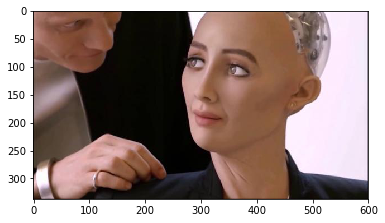

In [ ]:
img = cv2.imread(imgSRC) #[..., ::-1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

P1. ¿Que sucede si usamos matplotlib para mostrar una imágen leída con openCV?

OpenCV lee las imágenes en formato BGR (azul, verde, rojo), mientras que Matplotlib las lee en formato RGB (rojo, verde, azul). Si se usa matplotlib para leer una imagen ya leída con openCV, los colores aparecerán alterados, por lo que habría que convertir la imagen de BGR a RGB.

### **Consideraciones al mostrar imagenes con matplotlib**
 * Se realiza un autoescalado

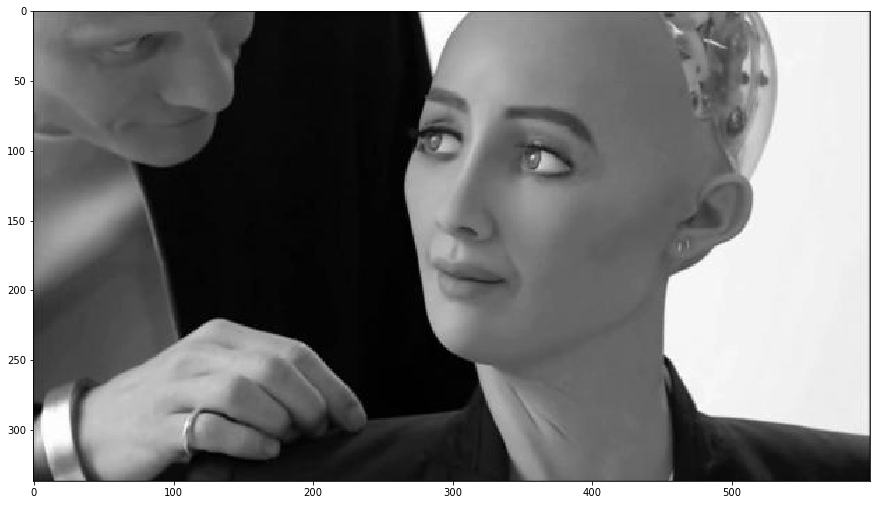

In [ ]:
img = cv2.imread(imgSRC,0)
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

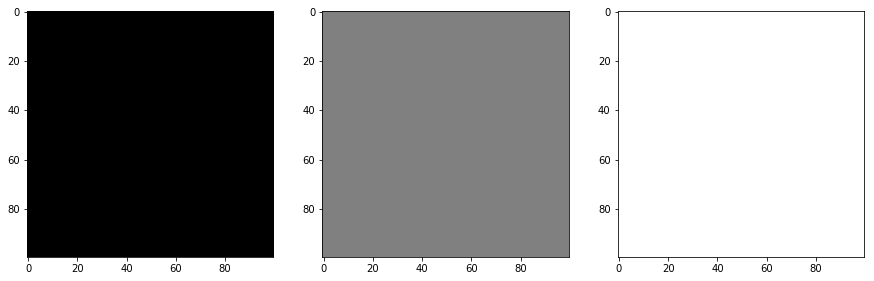

In [ ]:
black = np.zeros([100, 100], dtype=np.uint8)
gray = np.ones([100, 100], dtype=np.uint8) * 128
white = np.ones([100, 100], dtype=np.uint8) * 255

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(black, cmap='gray', vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(white, cmap='gray', vmin=0, vmax=255)
plt.show()

P2. Explique la utilidad de vmin y vmax y cuando es importante tenerlo en cuenta

vmin y vmax definen los límites mínimo y máximo, respectivamente, de los valores que se mapean en la escala de colores al visualizar una imagen, permitiendo establecer los colores a los valores de los píxeles.
*   vmin define el valor mínimo que se mapea al color más oscuro.
*   vmax define el valor máximo que se mapea al color más claro.

Estas dos funciones se utilizan para resaltar detalles específicos que podrían perderse debido a valores extremos.


### **Escalando los colores y dibujando dentro de una imagen**


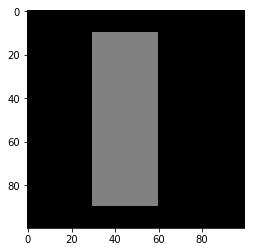

In [ ]:
black = np.zeros([100, 100], dtype=np.uint8)
black[10:90, 30:60] = 128

black = black/255

plt.imshow(black, cmap='gray', vmin=0, vmax=1)
plt.show()

P3. ¿Que tipo de dato es la imagen despues de dividir entre 255?


Una imagen es de tipo uint8 (enteros de 8 bits) con valores entre 0 y 255. Al dividirla entre 255, se obtiene una imagen de tipo flotante (float64) con valores en el rango [0,1] lo que permite normalizar los valores de los píxeles.



---


P4. Explique como funcionan los ejes en las imágenes mostradas en python.

Los ejes de las imágenes muestran las coordenadas espaciales de los píxeles. Para la librería matplotlib:

* Eje X: Es el eje vertical, empieza en la parte de arriba y se extiende hacia abajo.

* Eje Y: Es el eje horizontal, empieza en la parte izquierda y se extiende hacia la derecha.

Entonces, en el plano de matplotlib, el origen de los ejes de coordenadas (0,0) se sitúa en la esquina superior izquierda. En las coordenadas (x,y), "x" se refiere a la fila y "y" se refiere a la columna, lo cual es al revés del plano cartesiano habitual.

### **Creando formas dentro de una imagen con numpy y OpenCV**
 * cv2.rectangle(img, pt1, pt2, (color RGB), thickness= )
 * cv2.line(img, pt1, pt2, (color RGB),thickness= )

#### (El cuadrado rojo es realizado con numpy.  El cuadrado verde es realizado con OpenCV)

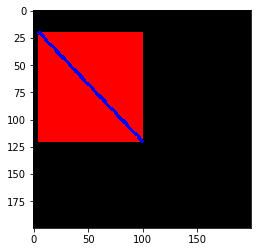

In [ ]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (5, 20)
PT2 = (100,120)
cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

* cv2.circle(img, (centro), radio, (color), thickness=)

* cv2.putText(img, "Texto", (punto de inicio), fuente, tamaño, (color), thickness=)
 * fuente -> cv2.FONT_HERSHEY_SIMPLEX

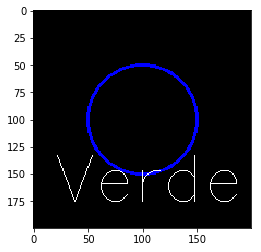

In [ ]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (0, 20)
PT2 = (100,120)

# cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
# cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)
cv2.circle(black, (100,100), 50, (255,0,0), thickness=2)
cv2.putText(black, "Verde", (20,175), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), thickness=1)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

### Cambiar tamaño de una imagen con OpenCV-> [resize](https://pythonexamples.org/python-opencv-cv2-resize-image/)

cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)

*******
* INTER_NEAREST
* INTER_LINEAR
* INTER_AREA
* INTER_CUBIC
* INTER_LANCZOS4

P5. Cree un bucle para mostrar la imágen original y el efecto de las 5 diferentes interpolaciones al escalar a la mitad su ancho y largo. Se nota la diferencia?

El siguiente código muestra la imagen original y el efecto de las 5 interpolaciones al escalar la original a la mitad.
No se nota la diferencia y esto es que debido a que se escala en reducción, desaparecen puntos y no se ve la forma en la que aparecen nuevos como es el caso para un escalado en ampliación.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(imgSRC)

# Dimensiones originales de la imagen
height, width = img.shape[:2]

# Escalar a la mitad
new_size = (width // 2, height // 2)

# Mostrar la imagen original antes de las interpolaciones
print("Imagen original:")
cv2_imshow(img)

# Lista de diferentes métodos de interpolación
interpolations = [
    ("INTER_NEAREST", cv2.INTER_NEAREST),
    ("INTER_LINEAR", cv2.INTER_LINEAR),
    ("INTER_CUBIC", cv2.INTER_CUBIC),
    ("INTER_LANCZOS4", cv2.INTER_LANCZOS4),
    ("INTER_AREA", cv2.INTER_AREA)
]

# Aplicar cada interpolación y redimensionar
for name, method in interpolations:
    resized_img = cv2.resize(img, new_size, interpolation=method)
    print(f"Interpolación: {name}")
    cv2_imshow(resized_img)

(337, 600, 3)


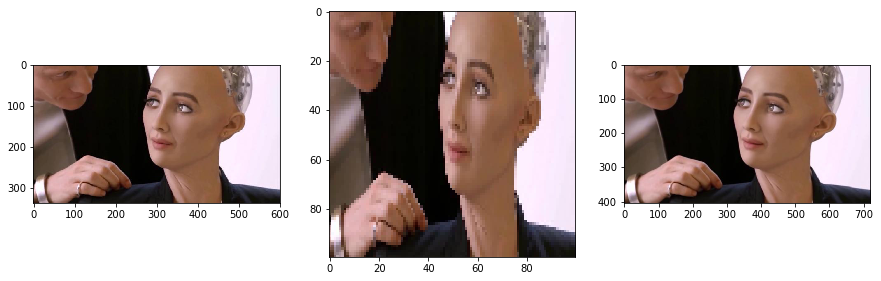

In [ ]:
img = cv2.imread(imgData)[...,::-1]

# img_resize_small = cv2.resize(img, None, fx=1/2, fy=1/3, interpolation=cv2.INTER_LINEAR)
img_resize_small = cv2.resize(img, (100,100), interpolation=cv2.INTER_LANCZOS4)
img_resize_big = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

print(img.shape)
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img_resize_small)
plt.subplot(133)
plt.imshow(img_resize_big)
plt.show()

### Mostrar imagen con OpenCV en una ventana
cv2.imshow(nombre de ventana, imagen)
* cv2.waitKey(0)  
* cv2.destroyAllWindows()  

In [ ]:
img = cv2.imread(imgSRC)
cv2.imshow('Robot Sofia', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# <font color=#FF0000>Operaciones de punto</color>


### Negativo de una imagen

* s = 255- f(r)

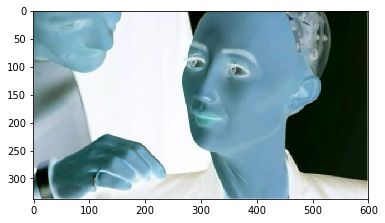

In [ ]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = 1 - r
plt.imshow(s)
plt.show()

### Tranformacion Logarítmica
* s = c.log(1+r)

1.836703775525035 21208797.0


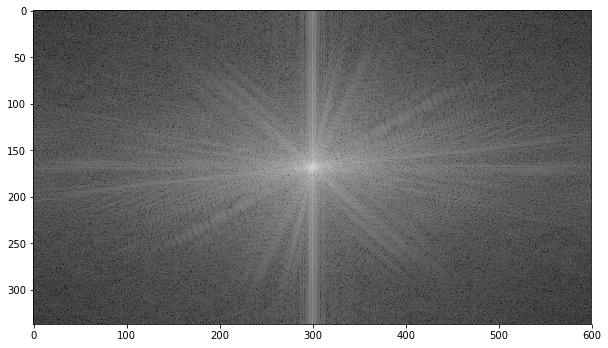

In [ ]:
img = cv2.imread(imgSRC, 0)

fft_2 = np.fft.fft2(img)
fft_2_abs = np.abs(fft_2)
fft_2_abs = np.fft.fftshift(fft_2_abs)
fft_2_abs_log = np.log(fft_2_abs+1)

plt.figure(figsize=(10,15))
plt.imshow(fft_2_abs_log, cmap='gray')
plt.show()

P6. Compruebe cuanto son los valores mínimo y máximo de la imagen original y de la imágen que muestra el espectro. Luego describa que efecto tuvo la transformación logarítmica.

Las líneas para obtener los valores mínimos y máximos de la imagen original y logaritmica respectivamente, se agregaron al código de arriba. Los valores mínimos para la imagen son 0 y 0.8594264721121966, y máximos son 255 y 18.56909421456653 para la original y la logaritmica en ese orden.    
El efecto de la transformación logarítmica es de comprimir el rango dinámico de la imagen, en la imagen resultante por tanto se evidencia el realce de áreas oscuras, compresion de áreas brillantes y mejora del contraste global.

### Transformación Gamma
###   $s=cr^\gamma $

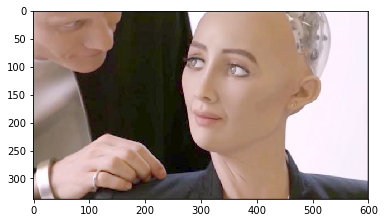

In [ ]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = r**2.3
plt.imshow(s)
plt.show()

### Transformación arbitraria
* ####   Especificar una funcion de transformacion
cv2.LUT(img, lut)

In [ ]:
img.shape

(337, 600)

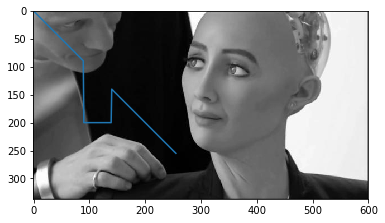

In [ ]:
funcion_ejemplo = np.arange(256)
funcion_ejemplo[90: 140] = 200

img = cv2.imread(imgSRC,0)
img_out = np.empty_like(img)
for m in range(img.shape[0]):
    for n in range(img.shape[1]):
        img_out[m,n] = funcion_ejemplo[img[m,n]]

plt.plot(funcion_ejemplo)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

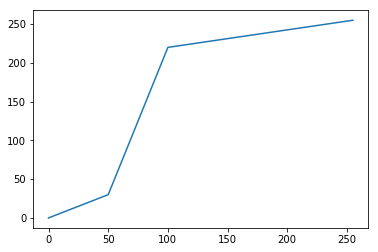

In [ ]:
r = np.zeros(256)

for pix in range(256):
    if pix < 50:
        r[pix] = 30/50*(pix-50) + 30
    if 50 <=pix < 100:
        r[pix] = 190/50*(pix-50) + 30
    if 100 <=pix:
        r[pix] = 35/155*(pix-100) + 220

plt.plot(r)
plt.show()

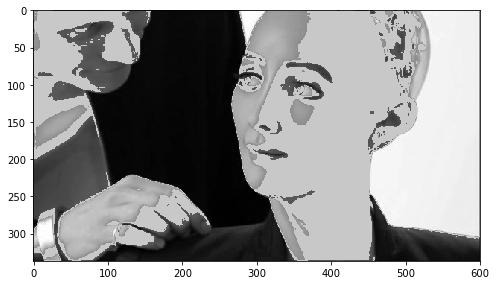

In [ ]:
img = cv2.imread(imgSRC,0)
s=cv2.LUT(img, funcion_ejemplo)
plt.figure(figsize=(8,10))
plt.imshow(s, cmap='gray')
plt.show()

### División en capas de bits

* np.bitwise_and(imagen, bit)

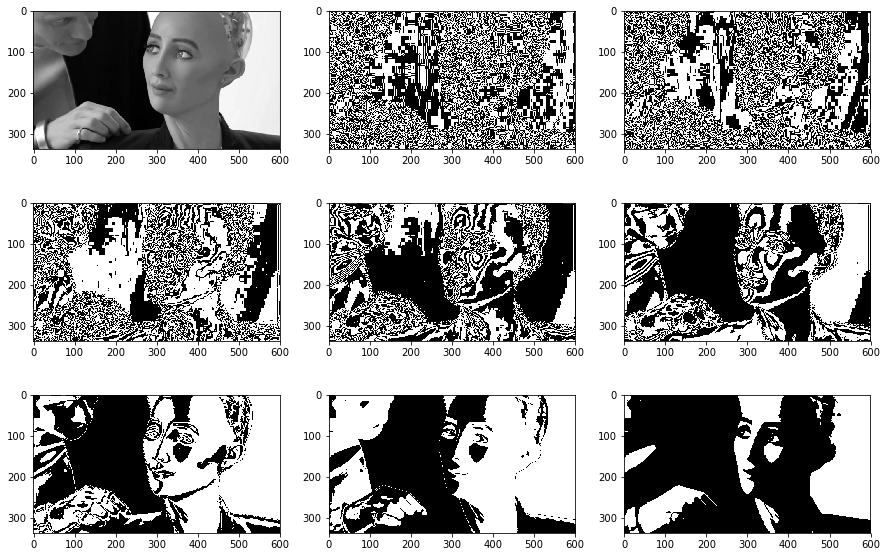

In [ ]:
img = cv2.imread(imgSRC, 0)

img7 = cv2.bitwise_and(img, 128)
img6 = cv2.bitwise_and(img, 64)
img5 = cv2.bitwise_and(img, 32)
img4 = cv2.bitwise_and(img, 16)
img3 = cv2.bitwise_and(img, 8)
img2 = cv2.bitwise_and(img, 4)
img1 = cv2.bitwise_and(img, 2)
img0 = cv2.bitwise_and(img, 1)

plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(332)
plt.imshow(img0, cmap="gray")
plt.subplot(333)
plt.imshow(img1, cmap="gray")
plt.subplot(334)
plt.imshow(img2, cmap="gray")
plt.subplot(335)
plt.imshow(img3, cmap="gray")
plt.subplot(336)
plt.imshow(img4, cmap="gray")
plt.subplot(337)
plt.imshow(img5, cmap="gray")
plt.subplot(338)
plt.imshow(img6, cmap="gray")
plt.subplot(339)
plt.imshow(img7, cmap="gray")

#### Mostrar solo las 5 capas mas significativas

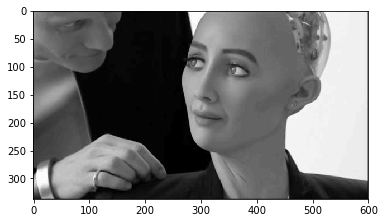

In [ ]:
img_comprimida = img7+ img6 + img5 + img4 + img3 + img2
plt.imshow(img_comprimida, cmap="gray", vmin=0, vmax=255)

P7. Si usted quisiera encriptar un  mensaje dentro de una fotografía, ¿cómo lo haría?

Un método bastante popular para lograr encriptaciones en imágenes es la esteganografía, que consiste en cambiar los bits menos significativos (LSB - least significant bit) de los píxeles originales a los bits necesarios para transmitir un mensaje en código binario (por ejemplo, se pueden enviar un texto mediante el código ASCII). Ya que el mensaje se oculta en la capa LSB, la alteración realizada a la imagen no es perceptible para los seres humanos.


---


### Histograma de una imagen
* np.histogram(img, bins, [rango de datos])  (requiere plotear)
* plt.hist(img.ravel(), bins, [rango de datos])
* cv2.calcHist([img], [canal], mascara,[bins], [rango de datos])

#####  Normalizar CDF $ \frac{cdf*hist.max}{cdf.max} $

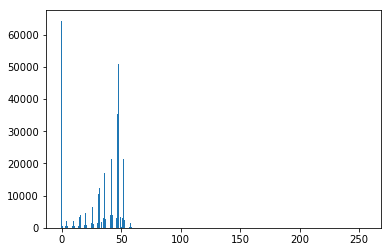

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

hist, bins = np.histogram(img_gray, 256, [0, 256])
plt.bar(np.arange(256), hist)
plt.show()

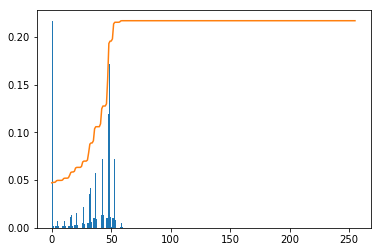

In [ ]:
#matplotlib
hist = plt.hist(img_gray.ravel(), 256, [0,256], density=True)
cdf = np.cumsum(hist[0])
cdf_norm = cdf*(hist[0].max())/(cdf.max())
plt.plot(cdf_norm)

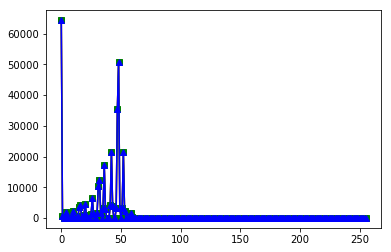

In [ ]:
# openCV
color = ("r*-", "gs-", "b^-")
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None,[256], [0,256])
    plt.plot(hist, col)

### Equalización de Histograma
* cv2.equalizeHist(img)

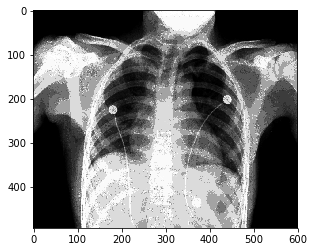

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

img_equ = cv2.equalizeHist(img_gray)
plt.imshow(img_equ, cmap="gray", vmin=0, vmax=255)

P8. ¿Qué sucede durante la equalización de histograma?

La ecualización de histograma mejora el contraste de una imagen distribuyendo más uniformemente los niveles de intensidad. La ecualización busca extender los niveles de gris a lo largo del rango completo (0-255) de modo que haya el mismo número de píxeles para cada nivel de gris, y así las áreas oscuras y claras ganan detalles.

### Equalización de Histograma adaptativa
*clahe = createCLAHE()
*clahe.apply(img)

* [CLAHE Histogram Eqalization](https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/)

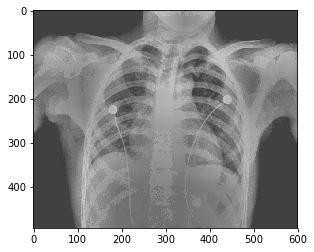

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(img_gray) + 60

plt.imshow(final_img, cmap="gray", vmin=0, vmax=255)

## Histogram Matching
https://www.pyimagesearch.com/2021/02/08/histogram-matching-with-opencv-scikit-image-and-python/
https://automaticaddison.com/how-to-do-histogram-matching-using-opencv/
